In [4]:
import cv2 as cv
from PIL import Image
from rasterio import open as rstopen
from os import path
from matplotlib import pyplot as plt
import numpy as np

p = path.abspath(path.curdir)
img = rstopen(path.join(p,'segmap_file/segmap.png')).read(1)
par = img[20000:30000, 10000:20000]

In [5]:
# ---------------------- full pipeline ----------------------
def gau_blur(denoisy,k):
    conn = cv.GaussianBlur(denoisy, (k,k), cv.BORDER_DEFAULT)
    bin_conn = conn
    bin_conn[conn>0] = 1.0
    int_conn = (bin_conn * 255).astype(np.int)
    return int_conn

def pipe(img, denoisy_k, denoisy_t, conn_k):
    # blur
    b = cv.blur(img, (denoisy_k, denoisy_k))
    # int
    int_b = (b * img * 255).astype(np.int)

    # threshold
    bin_b = int_b
    bin_b[int_b<denoisy_t] = 0
    bin_b[int_b>=denoisy_t] = 255

    # conn
    denoisy = (bin_b/255).astype(np.float)
    conn = gau_blur(denoisy, conn_k)

    return conn

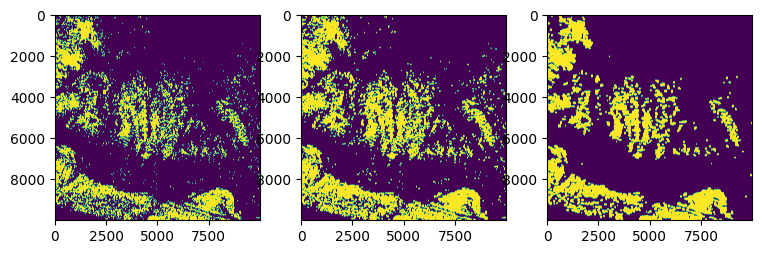

In [6]:
mask_par = (par/255).astype(np.float)
conn33 = pipe(mask_par, 33, 15, 33)
conn51 = pipe(mask_par, 33, 15, 51)
conn71 = pipe(mask_par, 71, 15, 71)

fig = plt.figure(figsize=(9,3))

fig.add_subplot(1,3,1)
plt.imshow(conn33)
fig.add_subplot(1,3,2)
plt.imshow(conn51)
fig.add_subplot(1,3,3)
plt.imshow(conn71)

fig.savefig('segmap_file/conn-compare.png')
